In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.cluster import KMeans

(1200, 1920, 3)
<type 'numpy.ndarray'>


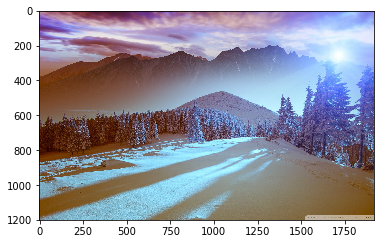

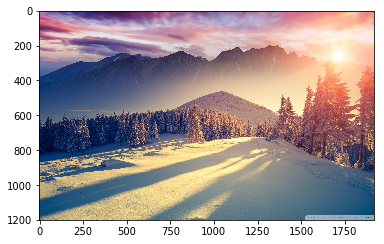

In [11]:
ig = cv2.imread('/home/ayush/Documents/BVP/Day2/im.jpg')
print ig.shape
print type(ig)
ig2 = cv2.cvtColor(ig, cv2.COLOR_BGR2RGB)
plt.imshow(ig)
plt.show()
plt.imshow(ig2)
plt.show()

(1200, 1920, 3)
(100, 160, 3)


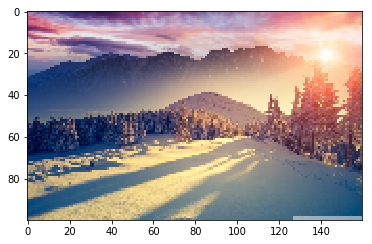

In [12]:
## Resize the image to reduce size
print ig2.shape
img = cv2.resize(ig2, (160,100))
print img.shape
plt.imshow(img)
plt.show()

In [15]:
data = img.reshape((16000, 3))
print data.shape

(16000, 3)


In [18]:
km = KMeans(n_clusters=8)
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
print km.n_clusters
cluster_centers = np.array(km.cluster_centers_, dtype=np.uint8)
print cluster_centers
print cluster_centers.shape

8
[[195 166 183]
 [ 63  83 117]
 [169 139 133]
 [246 217 180]
 [111 117 133]
 [ 27  45  89]
 [141  85  90]
 [223 177 137]]
(8, 3)


In [27]:
freq = np.unique(km.labels_, return_counts=True)[1]
print freq
print km.labels_.shape
freq = freq/float(len(km.labels_))
print freq

[1227 2237 2527 2455 2369 1820 1343 2022]
(16000,)
[0.0766875 0.1398125 0.1579375 0.1534375 0.1480625 0.11375   0.0839375
 0.126375 ]


In [29]:
## Combining data for palette
DOM_list = []
for ix in range(km.n_clusters):
    item = [cluster_centers[ix], freq[ix]]
    DOM_list.append(item)
    
for v1, v2 in DOM_list:
    print v1, v2

[195 166 183] 0.0766875
[ 63  83 117] 0.1398125
[169 139 133] 0.1579375
[246 217 180] 0.1534375
[111 117 133] 0.1480625
[27 45 89] 0.11375
[141  85  90] 0.0839375
[223 177 137] 0.126375


In [30]:
new_DOM = sorted(DOM_list, key=lambda z:z[1], reverse=True)
for v1, v2 in new_DOM:
    print v1, v2

[169 139 133] 0.1579375
[246 217 180] 0.1534375
[111 117 133] 0.1480625
[ 63  83 117] 0.1398125
[223 177 137] 0.126375
[27 45 89] 0.11375
[141  85  90] 0.0839375
[195 166 183] 0.0766875


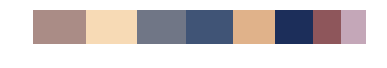

In [38]:
palette = np.ones((100, 1000, 3))
start = 0
for cx in range(km.n_clusters):
    width = int(palette.shape[1]*new_DOM[cx][1])
    end = start + width
    palette[:, start:end, :] = 255 - new_DOM[cx][0]
    start = end
    plt.axis("off")

plt.imshow(palette)
plt.show()